In [1]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from utils import *
from tgp_research_quantitative_tools.optionpricing.ClosedForm.Black import SpreadOptionTwoAssets
from tgp_research_quantitative_tools.optionpricing.MonteCarlo.DiffusionProcess import SingleAssetTwoFactorProcess

###  First, we set the details of our HRCO

In [70]:
as_of = dt.datetime(2023,12,3) # date of reference fwd curve

start_simulation_date = dt.datetime(2024, 5, 31)
end_simulation_date = dt.datetime(2025, 7, 1)

start_contract_date = dt.datetime(2024, 6, 1)
end_contract_date = dt.datetime(2025, 6, 30)

power_market = "ERCOTHOUHUB"
gas_market = "HH_gas"

granularity = "daily"
methodology = "spot" # we use spot simulations since we need the 1-day ahead prices

heat_rate = 12 # MMBtu/MWh
gas_adder = 0.05 # $/MMBtu
start_charge = 700 # MMBtu (to be multiplied by the gas price)
VOM = 0.8 # $/MWh
daily_volume = 24 * 200 # MWh

energy_payment_delay = 20 # days from delivery to payment date
payment_grouped_monthly = True # True if Energy Payments are group by month, False otherwise 

# Note that we simplify the pricing by assuming that the buyer of the HRCO only books slots of 24h each day.
# This follows the reasoning that if the MtM is positive, he will make the most out of it by booking the maximum daily amount available.

nb_scenarios = 100
interest_rate = 0.0425

In [71]:
simulation_dates = pd.date_range(start=start_simulation_date, end=end_simulation_date, freq='D')

In [72]:
# country = 'TTF_gas'  # country for single index simulation
# granularity = 'daily'  # time step in simulation
# list_of_dates = [None]

# start_simulation_date = dt.datetime(2025, 2, 11)  # first simulated date in period of diffusion
# end_simulation_date = dt.datetime(2025, 5, 10)  # last simulated date in period of diffusion
# as_of = dt.datetime(2025, 2, 10)  # date of reference fwd curve
# methodology = 'spot'  # can be "fwd" or "spot"
# nb_scenarios = 5000  # number of Monte Carlo simulations

# # PARAMETERS THAT IMPACT ONLY FWD SIMULATION
# # for spot simulation, they do not play a role
# start_fwd_date = dt.datetime(2025, 3, 1)  # first fwd contract to be simulated
# number_of_months = 2  # number of fwd contract to be simulated
# duration_of_contract = None  # duration of contracts to be simulated (1/12 for months, 1/4 for quarters,...)

# is_US = False

# with context_path_for_PFC(is_US):
#     start_calibration_date = dt.date.today() + relativedelta(days=-365)
#     end_calibration_date = dt.date.today() + relativedelta(days=-1)

#     nb_months_calib = 20
#     simulation1 = SingleAssetTwoFactorProcess.calibrate_and_simulate(country, start_simulation_date,
#                                                                         end_simulation_date,
#                                                                         methodology, granularity, list_of_dates,
#                                                                         number_of_months,
#                                                                         duration_of_contract, as_of, start_fwd_date,
#                                                                         nb_simulation=nb_scenarios,
#                                                                         start_calibration_date=start_calibration_date,
#                                                                         end_calibration_date=end_calibration_date,
#                                                                         nb_months_calibration=nb_months_calib)

In [73]:
# # with context_path_for_PFC(True):
# simulation_extra = SingleAssetTwoFactorProcess.calibrate_and_simulate(
#     "DE",
#     start_simulation_date,
#     end_simulation_date,
#     "spot",
#     granularity,
#     as_of = as_of, ## no curve yesterday in the US but only two days ago, weekend no supported here with this. TO FIX
#     start_fwd_date = start_contract_date,
#     nb_simulation = nb_scenarios,
#     start_calibration_date = dt.date.today() + relativedelta(years=-2),
#     end_calibration_date = dt.date.today() + relativedelta(days=-1),
#     nb_months_calibration=20 # this part is sometimes needed and sometimes not, look at what is happening. TO FIX
# )

# extra = simulation_extra.values

In [74]:
as_of = dt.datetime(2023,12,8) # date of reference fwd curve

with context_path_for_PFC(True):
    simulation_extra = SingleAssetTwoFactorProcess.calibrate_and_simulate(
        gas_market,
        start_simulation_date,
        end_simulation_date,
        "spot",
        granularity,
        as_of = as_of - dt.timedelta(days=1), ## no curve yesterday in the US but only two days ago, weekend no supported here with this. TO FIX
        start_fwd_date = start_contract_date,
        nb_simulation = nb_scenarios,
        start_calibration_date = dt.date(2023,3,1),
        end_calibration_date = dt.date(2023,12,1),
        nb_months_calibration=9 # this part is sometimes needed and sometimes not, look at what is happening. TO FIX
    )
    
extra = pd.DataFrame(simulation_extra.values, index=simulation_dates)

c:\Users\AMIREL\Desktop\Research HRCO\venv\lib\site-packages\tgp_research_quantitative_tools\optionpricing\MonteCarlo\two_factor_model.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp2 = pd.concat([df_temp, df_temp.shift(1)], axis=1).fillna(method='bfill')
c:\Users\AMIREL\Desktop\Research HRCO\venv\lib\site-packages\tgp_research_quantitative_tools\optionpricing\MonteCarlo\two_factor_model.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp2 = pd.concat([df_temp, df_temp.shift(1)], axis=1).fillna(method='bfill')
c:\Users\AMIREL\Desktop\Research HRCO\venv\lib\site-packages\tgp_research_quantitative_tools\optionpricing\MonteCarlo\two_factor_model.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.76369219023843e-06
            Iterations: 9
            Function evaluations: 48
            Gradient evaluations: 9
Time for solve_minimization_problem : 0.04 seconds
Time for compute_daily_gas_shaping_from_monthly_assessments : 0.04 seconds
Time for run_simulations : 0.92 seconds


In [75]:
extra.pct_change().std().mean() * np.sqrt(len(extra.index))

0.46368427757806435

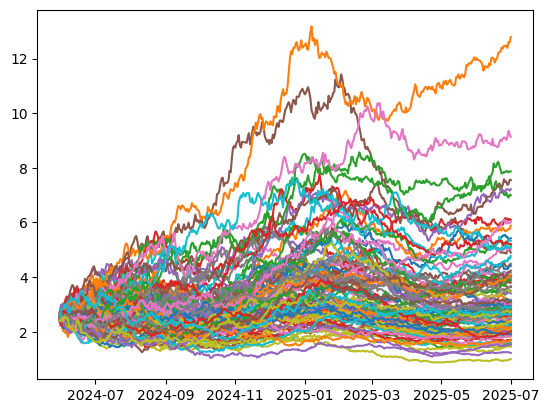

: 

In [ ]:
plt.plot(extra)
plt.show()

In [37]:
max_value = extra.max().max()
idx = (extra == max_value).stack().idxmax()


In [38]:
extra.loc[idx]

704.5120040293034

In [39]:
from scipy.stats import norm

S0 = extra.iloc[0].mean() # starting point
ST = extra.loc[idx] # maximum final point
T = (idx[0] - extra.index[0]).days # days from start to the maximum point
mu = extra.pct_change(axis=0).mean(axis=0).mean()
std = extra.pct_change(axis=0).std(axis=0).mean()


a = (np.log(S0/ST) + (mu - std**2 / 2) * T) / (std * np.sqrt(T))

# Prob of being above
prob = norm.cdf(a)
print(prob)

0.18838089385667106


In [40]:
1 / nb_scenarios

0.0001

In [41]:
extra.iloc[-1,:].mean()

92.98

In [42]:
S0, ST, T

(90.87, 704.5120040293034, 196)

In [43]:
extra.pct_change(axis=0).mean(axis=0).mean()

0.021591894360959634

In [44]:
extra.iloc[:,idx[1]].pct_change().mean()

0.026458451870670564

<Axes: >

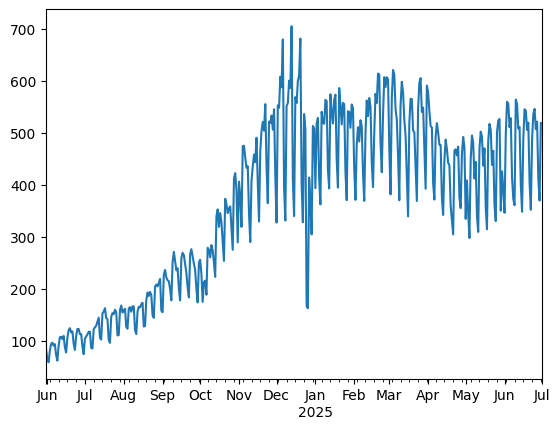

In [45]:
extra.iloc[:,idx[1]].plot()